<a href="https://colab.research.google.com/github/dl0312/19_system_programming_cse4100/blob/master/Machine%20Learning/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [0]:
epochs = 10
learning_rate = 0.01

In [0]:
batch_size = 128
num_classes = 10

In [0]:
def plot_images(x, y_true, y_pred=None, size=(5, 5)):
    assert len(x) == len(y_true) == size[0] * size[1]
    
    fig, axes = plt.subplots(size[0], size[1])
    fig.subplots_adjust(hspace=0.5, wspace=0.1)
    
    for i, ax in enumerate(axes.flat):
        if x[i].shape[-1] == 1:
            ax.imshow(x[i].reshape(x[i].shape[0], x[i].shape[1]), cmap = plt.cm.binary)
        else:
            ax.imshow(x[i], cmap = plt.cm.binary)
            
        if y_pred is None:
            xlabel = "True: {0}".format(y_true[i].argmax())
        else:
            xlabel = "True: {0}, Pred: {1}".format(y_true[i].argmax(),
                                                  y_pred[i].argmax())
        
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
if len(x_train.shape) < 4:
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

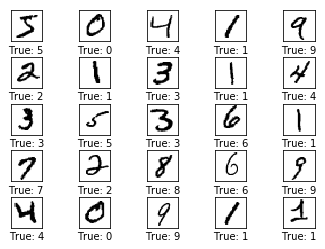

In [9]:
plot_images(x_train[:25], y_train[:25])

In [0]:
model = Sequential()

In [11]:
# Add a layer with 64 3 x 3 kernel size convolution filters and then use ReLU as an activation function.
# You can use arguments: strides, padding.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add a layer with 2 x 2 kernel size max pooling
# You can use arguments: strides, padding
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# Add a K to 128 fully connected layer and then use ReLU as an activation function
# K is previous layer output size
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optimizer = keras.optimizers.SGD(lr=learning_rate)

In [0]:
model.compile(optimizer=optimizer,  
#               loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              loss=keras.losses.categorical_crossentropy,  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [18]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))  # train the model

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 503s 8ms/step - loss: 0.9866 - acc: 0.6909 - val_loss: 0.2658 - val_acc: 0.9212
Epoch 2/10
60000/60000 [==============================] - 470s 8ms/step - loss: 0.3961 - acc: 0.8791 - val_loss: 0.2007 - val_acc: 0.9444
Epoch 3/10
60000/60000 [==============================] - 470s 8ms/step - loss: 0.3297 - acc: 0.8999 - val_loss: 0.1739 - val_acc: 0.9482
Epoch 4/10
60000/60000 [==============================] - 469s 8ms/step - loss: 0.2908 - acc: 0.9122 - val_loss: 0.1475 - val_acc: 0.9569
Epoch 5/10
60000/60000 [==============================] - 470s 8ms/step - loss: 0.2627 - acc: 0.9215 - val_loss: 0.1290 - val_acc: 0.9603
Epoch 6/10
60000/60000 [==============================] - 471s 8ms/step - loss: 0.2397 - acc: 0.9286 - val_loss: 0.1252 - val_acc: 0.9614
Epoch 7/10
60000/60000 [==============================] - 472s 8ms/step - 

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0800656108725816
Test accuracy: 0.9747


In [0]:
y_pred = model.predict(x_test)

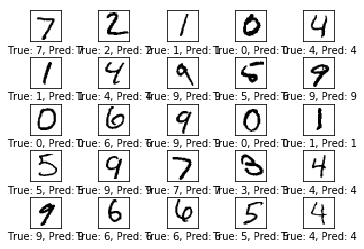

In [21]:
plot_images(x=x_test[:25], y_true=y_test[:25], y_pred=y_pred[:25])

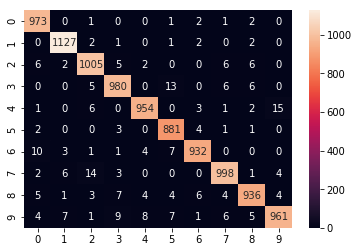

In [22]:
y_result = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(pd.DataFrame(y_result, range(10), range(10)), annot=True, fmt='g')